# MNIST - Handwriting Recognition

In [1]:
from com.yahoo.ml.caffe.DisplayUtils import *

Couldn't import dot_parser, loading of dot files will not be possible.


## Training Data

In [2]:
df = sqlCtx.read.parquet('/Users/mridul/bigml/mnist_test_dataframe')

In [3]:
show_df(df)

Index,Label,Image
00000000,7,
00000001,2,
00000002,1,
00000003,0,
00000004,4,
00000005,1,
00000006,4,
00000007,9,
00000008,5,
00000009,9,


# MNIST Neural Network


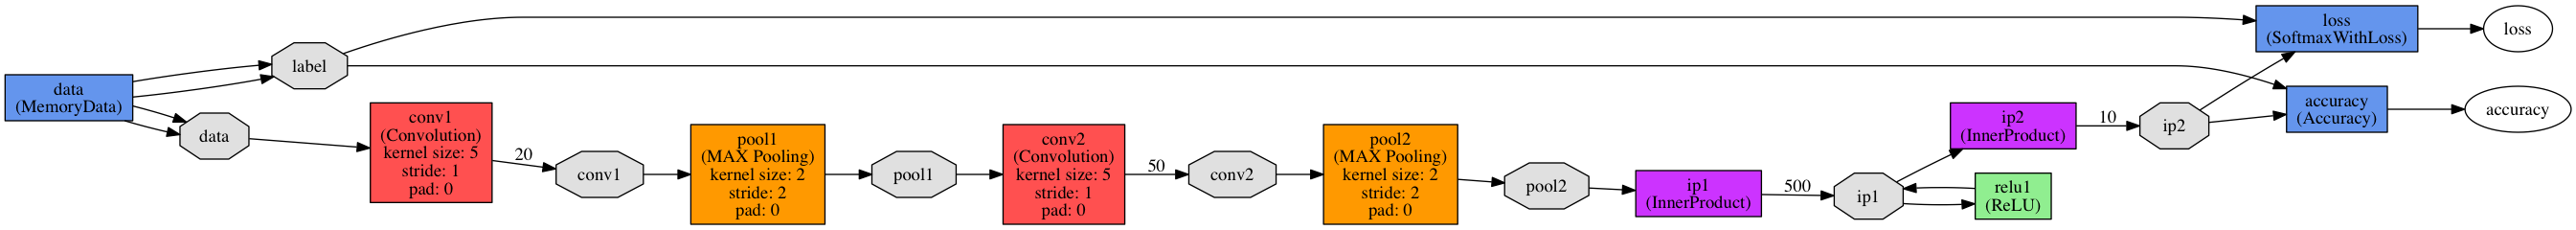

In [4]:
show_network("/Users/mridul/bigml/CaffeOnSpark/data/lenet_dataframe_train_test.prototxt", "LR")

# Training

In [5]:
from com.yahoo.ml.caffe.CaffeOnSpark import *
from com.yahoo.ml.caffe.Config import *
from com.yahoo.ml.caffe.DataSource import *
from pyspark.sql import DataFrame
from pyspark.mllib.linalg import Vectors
from pyspark.ml.classification import LogisticRegression
from pyspark.sql import Row

In [6]:
cos=CaffeOnSpark(sc,sqlContext)

In [7]:
args={}
args['conf']='/Users/mridul/bigml/CaffeOnSpark/data/lenet_dataframe_solver.prototxt'
args['model']='file:///tmp/lenet.model'
args['label']='label'
args['output']='file:outputlenet'
args['devices']='1'
args['outputFormat']='json'
args['train']='True'

In [10]:
cfg=Config(sc,args)
dl_train_source = DataSource(sc).getSource(cfg,True)


In [11]:
cos.train(dl_train_source)

# Test

In [8]:
cfg=Config(sc)
cfg.protoFile='/Users/mridul/bigml/CaffeOnSpark/data/lenet_dataframe_solver.prototxt'
cfg.modelPath = 'file:/tmp/lenet.model'
cfg.label = 'label'
cfg.outputPath = 'file:outputlenet'
cfg.devices = 1
cfg.outputFormat = 'json'
cfg.isTest = True
cfg.clusterSize = 1

Traceback (most recent call last):
  File "/Users/mridul/bigml/CaffeOnSpark/caffe-grid/src/main/python/com/yahoo/ml/caffe/ConversionUtil.py", line 617, in callJavaMethod
    return javaInstance(*_getConvertedTuple(args,sym,defaults,mirror))
  File "/Users/mridul/bigml/CaffeOnSpark/caffe-grid/src/main/python/com/yahoo/ml/caffe/ConversionUtil.py", line 604, in _getConvertedTuple
    convertedList.append(defaults[-argDifference+i])
IndexError: list index out of range


In [9]:
dl_test_source = DataSource(sc).getSource(cfg,False)

In [10]:
test_result=cos.test(dl_test_source)


In [11]:
test_result

{u'accuracy': [0.9902000057697297], u'loss': [0.029489620565036602]}

# Feature Extraction

In [12]:
args['conf']='/Users/mridul/bigml/CaffeOnSpark/data/lenet_dataframe_solver.prototxt'
args['model']='file:/tmp/lenet.model'
args['features']='accuracy,ip1,ip2'
args['label']='label'
args['output']='file:outputlenet'
args['devices']='1'
args['outputFormat']='json'

In [13]:
cfg=Config(sc,args)
dl_features_source = DataSource(sc).getSource(cfg,False)

In [14]:
f=cos.features(dl_features_source)

In [15]:
f.show(10)


+--------+--------+--------------------+--------------------+-----+
|SampleID|accuracy|                 ip1|                 ip2|label|
+--------+--------+--------------------+--------------------+-----+
|00000000|   [1.0]|[0.0, 1.7230624, ...|[-4.4349256, 0.77...|[7.0]|
|00000001|   [1.0]|[2.241662, 2.0895...|[2.3466282, 5.075...|[2.0]|
|00000002|   [1.0]|[0.3203971, 0.0, ...|[-1.4074882, 11.5...|[1.0]|
|00000003|   [1.0]|[0.0, 0.0, 1.7143...|[12.331103, -3.74...|[0.0]|
|00000004|   [1.0]|[0.0, 2.151341, 0...|[-1.9443462, -1.8...|[4.0]|
|00000005|   [1.0]|[0.63752973, 0.0,...|[-2.0524268, 14.7...|[1.0]|
|00000006|   [1.0]|[0.0, 0.0, 0.0, 0...|[-10.035266, -1.1...|[4.0]|
|00000007|   [1.0]|[1.4096186, 0.0, ...|[-6.5612993, -1.7...|[9.0]|
|00000008|   [1.0]|[0.0, 0.65123135,...|[-7.976185, -2.48...|[5.0]|
|00000009|   [1.0]|[0.15449825, 0.0,...|[-7.0249095, -7.7...|[9.0]|
+--------+--------+--------------------+--------------------+-----+
only showing top 10 rows



In [16]:
f.take(1)

[Row(SampleID=u'00000000', accuracy=[1.0], ip1=[0.0, 1.7230623960494995, 3.900195360183716, 0.0, 0.7860769629478455, 0.0, 0.43525364995002747, 1.7325553894042969, 3.02728533744812, 0.0, 0.0, 0.32874515652656555, 1.484613060951233, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4229710102081299, 1.0581926107406616, 0.0, 0.0, 1.6249409914016724, 0.0, 3.3126580715179443, 0.9278226494789124, 2.160175085067749, 0.8179233074188232, 0.0, 3.365065097808838, 2.4310269355773926, 0.9005669951438904, 0.0, 1.0325015783309937, 0.0, 3.640773057937622, 0.5364271998405457, 1.765023112297058, 0.0, 1.4949694871902466, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0649217367172241, 0.0, 3.4997949600219727, 1.4268187284469604, 0.0, 1.694330096244812, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0749611854553223, 0.0, 0.8542112708091736, 0.0, 1.700496792793274, 0.0, 0.4628939628601074, 0.804745614528656, 0.9723028540611267, 0.0, 0.0, 0.0, 1.3510560989379883, 0.0, 0.0, 0.0, 0.5889573693275452, 0.8592365384101868, 0.0, 0.0, 0.0, 2.12093806266784

In [17]:
def maxScoreAndIndex(array_of_scores): 
    return max(enumerate(array_of_scores), key=lambda x: x[1])

In [18]:
g = sqlContext.createDataFrame(f.map(lambda row: (
            row.SampleID,
            row.accuracy[0],
            row.ip2,
            maxScoreAndIndex(row.ip2)[1],
            maxScoreAndIndex(row.ip2)[0],
            int(row.label[0]))), ["SampleID", "Accuracy", "Scores", "MaxScore", "Prediction", "Label"])

In [19]:
g.toPandas()[:10]

,SampleID,Accuracy,Scores,MaxScore,Prediction,Label
0,00000000,1,"[-4.43492555618, 0.770899236202, -0.7764759063...",14.698466,7,7
1,00000001,1,"[2.34662818909, 5.07572650909, 19.0511646271, ...",19.051165,2,2
2,00000002,1,"[-1.40748822689, 11.5601463318, -1.4302021265,...",11.560146,1,1
3,00000003,1,"[12.3311033249, -3.74774122238, -0.41824337840...",12.331103,0,0
4,00000004,1,"[-1.9443461895, -1.85174667835, -4.93777418137...",14.716723,4,4
5,00000005,1,"[-2.05242681503, 14.7597370148, -1.55031645298...",14.759737,1,1
6,00000006,1,"[-10.0352659225, -1.15080213547, -4.0383753776...",13.797885,4,4
7,00000007,1,"[-6.56129932404, -1.74324595928, 0.17224976420...",13.436018,9,9
8,00000008,1,"[-7.97618484497, -2.48602437973, -4.9686756134...",12.191966,5,5
9,00000009,1,"[-7.02490949631, -7.72464418411, -7.6051096916...",19.793285,9,9


###  Logistic Regression using MLlib

In [20]:
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

In [21]:
data = f.map(lambda row: LabeledPoint(row.label[0], Vectors.dense(row.ip1)))

In [22]:
lr = LogisticRegressionWithLBFGS.train(data, numClasses=10, iterations=10)

In [23]:
predictions = lr.predict(data.map(lambda pt : pt.features))

In [24]:
predictions.take(5)

[7, 2, 1, 0, 4]